<a href="https://colab.research.google.com/github/angelome/python_financial/blob/main/Value_exotic_options.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

below a step-by-step guide to value an Up-and-In European barrier call option

Imports and set up

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Barrier options are path dependent. 
That means the value of the option is dependent on the price path of the underlying. 
To create the price path, we need to simulate stock prices. 
One way is simulate stock prices with geometric Brownian motion.

In [3]:
def simulate_gbm(s_0, mu, sigma, T, N, n_sims=10**3, random_seed=1):
    """Simulate stock returns using Geometric Brownian Motion."""
    """This function returns 1,000 simulated price paths"""
    
    np.random.seed(random_seed)
    dt = T / N
    dW = np.random.normal(scale=np.sqrt(dt), size=(n_sims, N + 1))

    # simulate the evolution of the process
    S_t = s_0 * np.exp(np.cumsum((mu - 0.5 * sigma**2) * dt + sigma * dW, axis=1))
    S_t[:, 0] = s_0

    return S_t

The simulation starts with a stock price of $55 (S_0), a risk free of 6% (r), and volatility of 20% (sigma). 

T is the time frame of the simulation (in this case one year) and N is the time step (in this case 252 trading days). 

Setting T and N this way simulates one price per day for a year. 

The barrier is set to USD 65 and the strike price is USD 60.

In [4]:
S_0 = 55
r = 0.06
sigma = 0.2
T = 1
N = 252

BARRIER = 65
K = 60

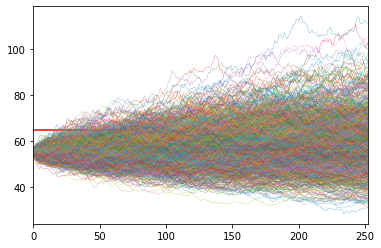

In [5]:
#Run the simulation ...
gbm_sims = simulate_gbm(s_0=S_0, mu=r, sigma=sigma, T=T, N=N)

#...and plot the price paths and barrier.
plt.axhline(y=BARRIER, color='r', linestyle='-')
plt.xlim(0, N)
plt.plot(gbm_sims.T, linewidth=0.25);

In [9]:
type (gbm_sims)

numpy.ndarray

In [16]:
print ("the number of dimensions is " + str (np.ndim (gbm_sims)))
print (np.shape (gbm_sims))
print (np.size (gbm_sims))

the number of dimensions is 2
(1000, 253)
253000


In [10]:
gbm_sims[0:5]

array([[55.        , 55.72384026, 55.36305305, ..., 72.47391892,
        72.27491999, 69.78690242],
       [55.        , 56.63779756, 55.90616748, ..., 63.50705743,
        63.31022783, 63.47146872],
       [55.        , 54.68981626, 54.28578379, ..., 61.36803564,
        60.83552174, 60.81002874],
       [55.        , 55.94041176, 55.1454073 , ..., 62.64646093,
        63.16996846, 62.11320171],
       [55.        , 54.82476884, 55.92654867, ..., 67.00745565,
        67.39144932, 67.68252745]])

To value the barrier option

First, find the maximum simulated price for each price path. 

Since this is an Up-and-In option, you just need to know if the maximum price reached the barrier level at any time.

In [6]:
max_value_per_path = np.max(gbm_sims, axis=1)

In [13]:
max_value_per_path [0:5]

array([78.06224298, 70.38547513, 67.76527999, 72.14535369, 67.68252745])

In [17]:
print ("the number of dimensions is " + str (np.ndim (max_value_per_path)))
print (np.shape (max_value_per_path))
print (np.size (max_value_per_path))

the number of dimensions is 1
(1000,)
1000


In [18]:
#If the option reaches the barrier, the payoff is the same as a plain vanilla European call option.

payoff = np.where( max_value_per_path > BARRIER, 
                  np.maximum(0, gbm_sims[:, -1] - K), 0)

In [20]:
payoff[0:5]

array([9.78690242, 3.47146872, 0.81002874, 2.11320171, 7.68252745])

In [21]:
print ("the number of dimensions is " + str (np.ndim (payoff)))
print (np.shape (payoff))
print (np.size  (payoff))

the number of dimensions is 1
(1000,)
1000


In [19]:
"""You can use NumPy’s where method to find the payoffs. 
The first argument is an array of true or false depending 
on whether the maximum value of a price path exceeds the barrier. 
Where it’s true, you get the maximum value of the last stock price 
in the simulation minus the strike price, or zero. 
That’s the same payoff as a plain vanilla European call option."""

#To value the option, discount the average of the payoffs back to today.

discount_factor = np.exp(-r * T)
premium = discount_factor * np.mean(payoff)
premium

4.019441670553388

Change the barrier and strike price. What happens to the value of the option? 

What about when you change the volatility of the simulated stock prices?